<a href="https://colab.research.google.com/github/suOdeyemi/Customer-Purchase-Prediction---SVM-Classifier/blob/main/SVM_Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- To predict whether a user purchases a product or not based on their age and estimated salary.
- Dataset info: https://www.kaggle.com/datasets/rakeshrau/social-network-ads?resource=download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
#Reads the first 11 datapoints in my set
df = pd.read_csv('Social_Network_Ads.csv')
df.head(11)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#Gets basic summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


- There are 400 datapoints and 5 columns (features).
- I'll be using Age and EstimatedSalary for my analysis.

In [ ]:
# X are the features used to predict y
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [ ]:
# Training/Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Since SVM is very sensitive to feature scale, it's important to standardize the data.

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters and model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


- C --> The slack parameter (which controls regularization)
- Gamma --> Controls how far the influence of a support vector reaches
- Kernel --> Controls the higher dimensional space so that the data becomes linearly separable.
- Overal, this portion allows for the reduction of the bias (underfitting) and variance (overfitting) by tuning parameters with real evaluation (cross-validation). The result is a model with reasonable generalization.

In [ ]:
# Predictions
y_pred = best_model.predict(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925
F1 Score: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



- The SVM model performed really well, achieving an accuracy of 92.5% and an F1-score of about 0.90. For non-purchasers (Class 0), the model had a precision of 0.96 and recall of 0.92, meaning it was very good at identifying people who didn't buy. For purchasers (Class 1), it achieved a precision of 0.87 and recall of 0.93, correctly identifying 93% of the buyers. Though there was a slight class imbalance (52 non-purchasers vs. 28 purchasers), the model still handled this effectively.

- The macro and weighted F1 scores, both around 0.92–0.93, show that the model performed consistently well for both classes. Overall, the model strikes a solid balance between bias and variance, thanks to the optimized parameters and use of the kernel trick to handle the data's non-linearity.

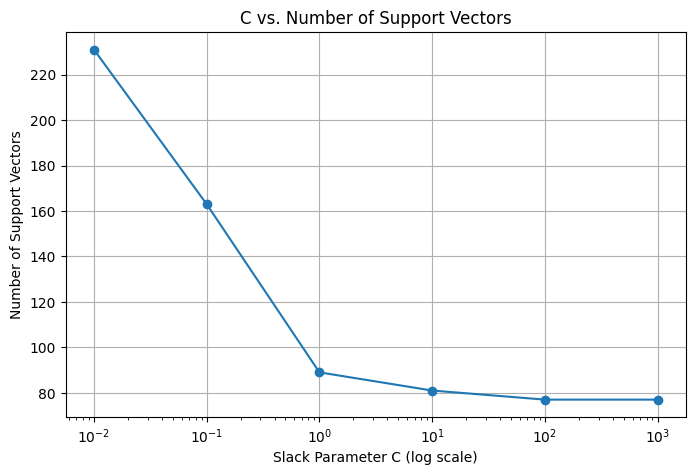

In [ ]:
C_vals = [0.01, 0.1, 1, 10, 100, 1000]
support_counts = []

for C in C_vals:
    model = SVC(C=C, kernel='rbf', gamma='scale')
    model.fit(X_train_scaled, y_train)
    support_counts.append(sum(model.n_support_))

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_vals, support_counts, marker='o')
plt.xscale('log')
plt.xlabel("Slack Parameter C (log scale)")
plt.ylabel("Number of Support Vectors")
plt.title("C vs. Number of Support Vectors")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- The C parameter plays a crucial role in controlling the model's complexity. A higher C value would force the model to be stricter about minimizing errors, leading to fewer misclassifications on the training data. However, this could result in overfitting if the model is too sensitive to noise. A lower C value encourages a simpler model with a wider margin, which might not fit the training data as perfectly, but is more likely to generalize well to unseen data.

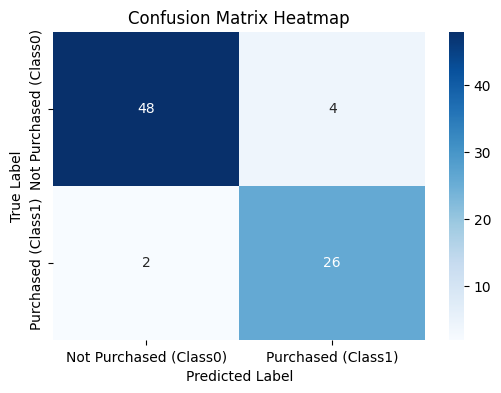

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased (Class0)', 'Purchased (Class1)'],
            yticklabels=['Not Purchased (Class0)', 'Purchased (Class1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

- As you can see, majority of our predicated values are represented with a few missclassification for both instances.

In [ ]:
def plot_decision_boundary(X, y, model, title):
    # Set step size for the grid
    h = 0.01

    # Get min/max for each axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1 (scaled)' if title.startswith("Linear") else 'Age (scaled)')
    plt.ylabel('Feature 2 (scaled)' if title.startswith("Linear") else 'Estimated Salary (scaled)')
    plt.grid(True)
    plt.show()

- The defined function visualizes how an SVM model separates two classes by predicting across a grid of values and shading regions based on predicted class. It overlays the actual data points on top, letting you see how well the model's decision boundary aligns with your training data.

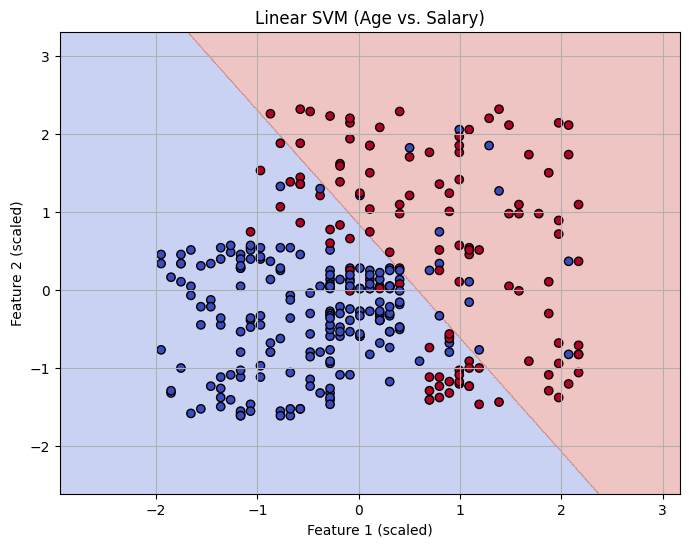

In [ ]:
# Comparing Linear kernel with Kernel Trick
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)
plot_decision_boundary(X_train_scaled, y_train, linear_svm, "Linear SVM (Age vs. Salary)")

- This code trains a Linear SVM on the scaled training data to find a straight-line decision boundary between classes. It then visualizes the result using plot_decision_boundary() to show how well (or poorly) the linear model separates the classes based on Age and Salary.

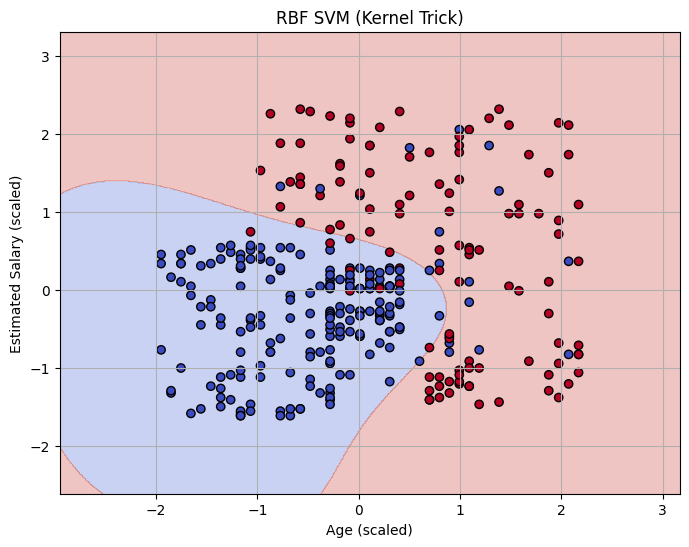

In [ ]:
# Kernel Trick
rbf_svm = svm.SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)
plot_decision_boundary(X_train_scaled, y_train, rbf_svm, "RBF SVM (Kernel Trick)")

- This part trains an SVM with an RBF (Radial Basis Function) kernel, which uses the kernel trick to map the data into a higher-dimensional space for better separation. It then plots the curved decision boundary, showing how the model captures complex patterns that a linear SVM could not.